In [317]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [318]:
df = pd.read_csv('baseball_hitting.csv')

# Data Understanding


In [319]:
df.head()

,Player name,position,Games,At-bat,Runs,Hits,Double (2B),third baseman,home run,run batted in,a walk,Strikeouts,stolen base,Caught stealing,AVG,On-base Percentage,Slugging Percentage,On-base Plus Slugging
0,B Bonds,LF,2986.0,9847.0,2227.0,2935.0,601.0,77.0,762.0,1996.0,2558.0,1539,514.0,141,0.298,0.444,0.607,1.051
1,H Aaron,RF,3298.0,12364.0,2174.0,3771.0,624.0,98.0,755.0,2297.0,1402.0,1383,240.0,73,0.305,0.374,0.555,0.929
2,B Ruth,RF,2504.0,8399.0,2174.0,2873.0,506.0,136.0,714.0,2213.0,2062.0,1330,123.0,117,0.342,0.474,0.690,1.164
3,A Pujols,1B,3080.0,11421.0,1914.0,3384.0,686.0,16.0,703.0,2218.0,1373.0,1404,117.0,43,0.296,0.374,0.544,0.918
4,A Rodriguez,SS,2784.0,10566.0,2021.0,3115.0,548.0,31.0,696.0,2086.0,1338.0,2287,329.0,76,0.295,0.380,0.550,0.930


In [320]:
df.shape

(2508, 18)

In [321]:
df.columns

Index(['Player name', 'position', 'Games', 'At-bat', 'Runs', 'Hits',
       'Double (2B)', 'third baseman', 'home run', 'run batted in', 'a walk',
       'Strikeouts', 'stolen base ', 'Caught stealing', 'AVG',
       'On-base Percentage', 'Slugging Percentage', 'On-base Plus Slugging'],
      dtype='object')

In [322]:
df = df.drop(columns=['stolen base ', 'a walk', 'Caught stealing', 'third baseman', 'On-base Plus Slugging'])

df = df.rename(columns={'Player name': 'player_name',
                   'Games': 'games',
                   'At-bat': 'at_bat',
                   'Runs': 'runs',
                   'Hits': 'hits',
                   'Double (2B)': 'double',
                   'home run': 'home_run',
                   'run batted in': 'run_batted_in',
                   'Strikeouts': 'strikeouts',
                   'AVG': 'avg',
                   'On-base Percentage': 'on_base_percentage',
                   'Slugging Percentage': 'slug_perc'})

In [323]:
df.columns

Index(['player_name', 'position', 'games', 'at_bat', 'runs', 'hits', 'double',
       'home_run', 'run_batted_in', 'strikeouts', 'avg', 'on_base_percentage',
       'slug_perc'],
      dtype='object')

In [324]:
df.describe()

,games,at_bat,runs,hits,double,home_run,run_batted_in,avg,on_base_percentage,slug_perc
count,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,1084.558000,3714.962000,521.644800,1010.86560,181.858000,100.611600,494.206400,0.263320,0.331582,0.409925
std,595.403651,2290.458916,380.061349,681.62211,124.474271,99.984933,362.625548,0.024778,0.030770,0.050081
min,2.000000,262.000000,32.000000,57.00000,7.000000,17.000000,37.000000,0.123000,0.157000,0.197000
25%,616.750000,1874.500000,231.750000,471.25000,86.000000,33.000000,222.000000,0.247000,0.311000,0.375000
50%,998.000000,3266.500000,423.500000,853.50000,154.000000,69.000000,404.000000,0.262000,0.330000,0.407000
75%,1438.250000,5105.750000,719.250000,1399.25000,249.000000,125.500000,656.250000,0.278000,0.351000,0.441000
max,3562.000000,14053.000000,2295.000000,4256.00000,792.000000,762.000000,2297.000000,0.367000,0.482000,0.690000


In [325]:
df.dtypes

player_name            object
position               object
games                 float64
at_bat                float64
runs                  float64
hits                  float64
double                float64
home_run              float64
run_batted_in         float64
strikeouts             object
avg                   float64
on_base_percentage    float64
slug_perc             float64
dtype: object

In [326]:
df.fillna(0, inplace=True)

# Data Preperation

In [327]:
df['hits_to_homerun'] =  df['home_run'] / df['hits']

In [328]:
df[df['hits_to_homerun'] == df['hits_to_homerun'].max()]

,player_name,position,games,at_bat,runs,hits,double,home_run,run_batted_in,strikeouts,avg,on_base_percentage,slug_perc,hits_to_homerun
360,J Gallo,OF,755.0,2374.0,403.0,474.0,90.0,179.0,390.0,1052,0.2,0.325,0.471,0.377637


In [329]:
df[df.home_run == df.home_run.max()]

,player_name,position,games,at_bat,runs,hits,double,home_run,run_batted_in,strikeouts,avg,on_base_percentage,slug_perc,hits_to_homerun
0,B Bonds,LF,2986.0,9847.0,2227.0,2935.0,601.0,762.0,1996.0,1539,0.298,0.444,0.607,0.259625


In [330]:
df.isna().sum()

player_name           0
position              0
games                 0
at_bat                0
runs                  0
hits                  0
double                0
home_run              0
run_batted_in         0
strikeouts            0
avg                   0
on_base_percentage    0
slug_perc             0
hits_to_homerun       8
dtype: int64

# Feature Understanding


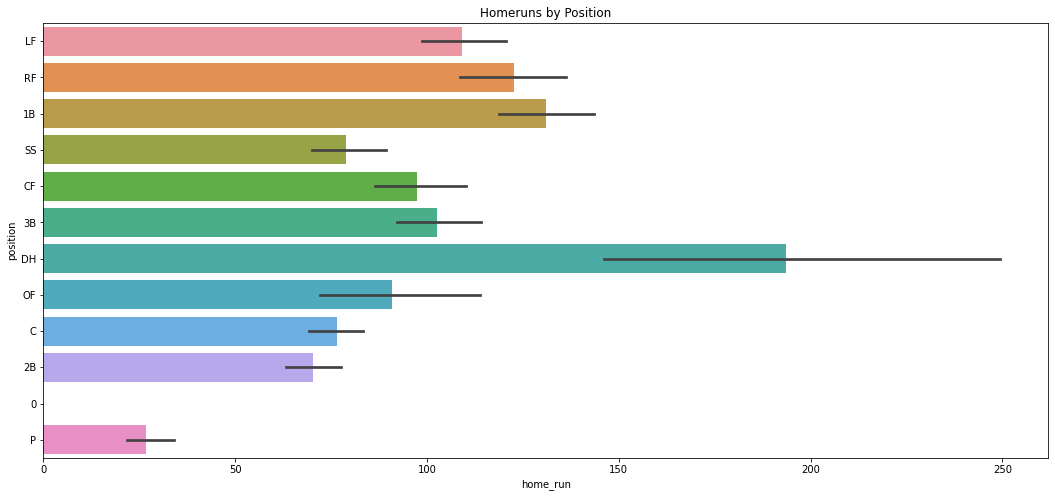

In [331]:
plt.figure(figsize=(18, 8))
plt.title('Homeruns by Position')
sns.barplot(y=df['position'], x=df['home_run'])
plt.show()

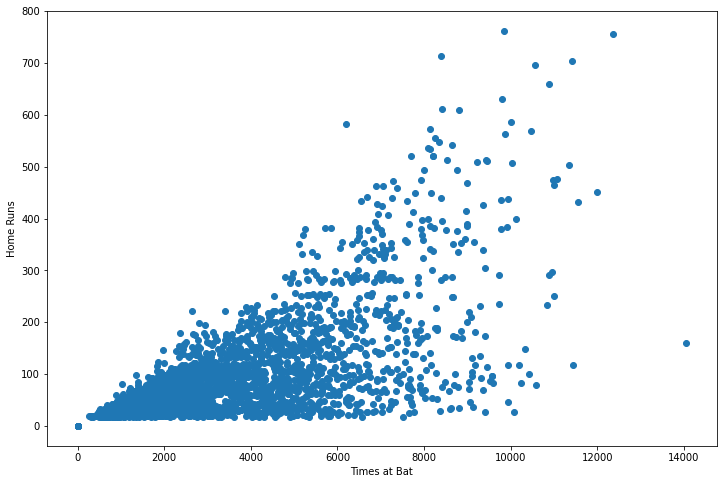

In [332]:
plt.figure(figsize=(12, 8))
plt.scatter(x = df.at_bat, y= df.home_run)
plt.xlabel('Times at Bat')
plt.ylabel('Home Runs')
plt.show()

[]

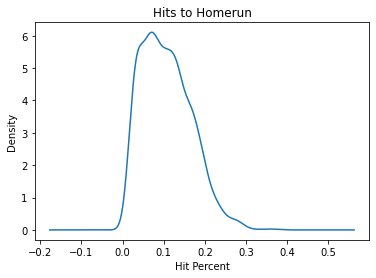

In [333]:
ax = df['hits_to_homerun'].plot(kind='kde',
                                title='Hits to Homerun')
ax.set_xlabel('Hit Percent')
ax.plot()

# Questions about the data


Who are the players with a minimum of 500 homeruns?

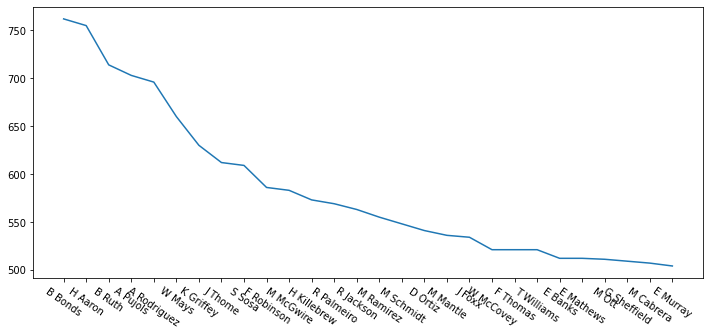

In [334]:
over_500 = df[df['home_run'] > 500]
plt.figure(figsize=(12, 5))
plt.plot(over_500['player_name'], over_500['home_run'])
plt.xticks(rotation=-35)
plt.show()

What do the games to homeruns look like per position?

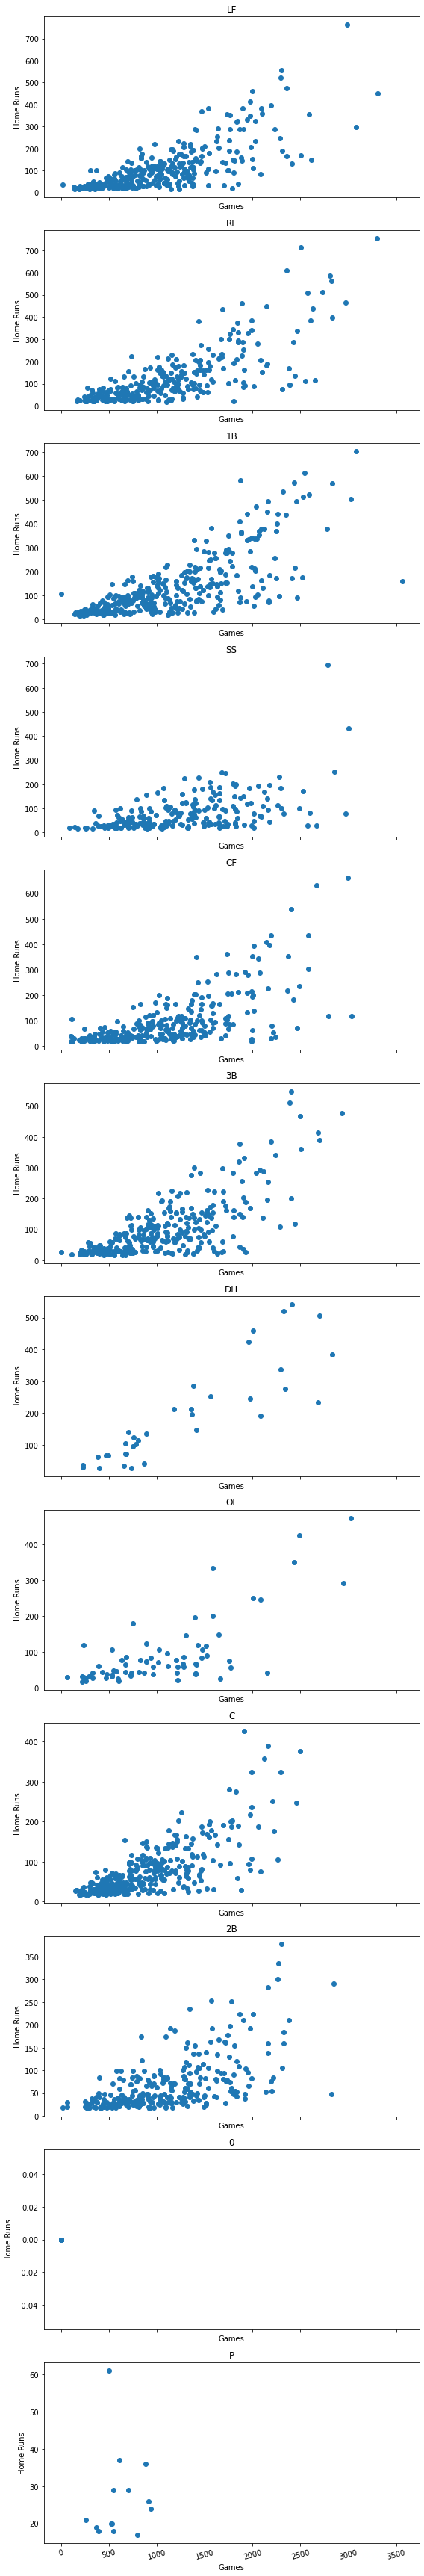

In [335]:
positions = df['position'].unique()

fig, axes = plt.subplots(len(positions), 1, figsize=(8, 4*len(positions)), sharex=True)

# Loop through each position and create scatter plot in its corresponding subplot
for i, position in enumerate(positions):
    data = df[df['position'] == position]
    axes[i].scatter(data['games'], data['home_run'])
    axes[i].set_title(position)
    axes[i].set_xlabel('Games')
    axes[i].set_ylabel('Home Runs')
    axes[i].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

# Building Decision Tree Model

In [336]:
X = df[['at_bat', 'runs', 'hits', 'avg', 'double']]
y = df['home_run']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.02


Increasing the accuracy 😅 (hopefully.)

I want to see if we can get a more accurate representation but, this time using positions. So, I want to change position values to INT which will allow me to use them in the decision tree.

In [337]:
df.position.unique()

array(['LF', 'RF', '1B', 'SS', 'CF', '3B', 'DH', 'OF', 'C', '2B', 0, 'P'],
      dtype=object)

In [338]:
#There is no 0 because I used 0 to replace NaN values
position_mapping = {'LF': 1, 'RF': 2, '1B': 3, 'SS': 4, 'CF': 5, '3B': 6, 'DH': 7, 'OF': 8, 'C': 9, '2B': 10, 'P': 11}
df['position'] = df['position'].replace(position_mapping)

In [342]:
X = df[['position', 'runs', 'hits', 'avg', 'double']]
y = df['home_run']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

base_classifier = DecisionTreeClassifier(max_depth=5)

clf = BaggingClassifier(base_classifier, n_estimators=10)

# Train the model and make predictions
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')


Accuracy: 0.0199203187250996
